## Task Dos
### KNN clasificación

Primero queremos improtar nuesto dataset para clasificacion y conocer como se comporta primero que nada. 

In [1]:
import numpy as np
import math
import pandas as pd
import scipy.spatial
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

#leer el csv de dataset en un dataframe
dfknn= pd.read_csv("./Oranges vs Grapefruit.csv")
dfknn.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


Del codigo que vemos en la seccion de arriba, tenemos que el dataset tiene unas variables que describen a la variable name. Lo que nos indica que name sera la variable que querremos predecir. 

In [2]:
dfknn.loc[dfknn['name'] == 'orange', 'num'] = 0 
dfknn.loc[dfknn['name'] == 'grapefruit', 'num'] = 1 

Creamos una varibale factorial para poder representar la variable de "name" con números y en dado caso necesitemos usar otros modelos como regresiones o baye singenuo, podamos usar esta variable para predecir la variable name. 

In [3]:
dfknn.head()

,name,diameter,weight,red,green,blue,num
0,orange,2.96,86.76,172,85,2,0.0
1,orange,3.91,88.05,166,78,3,0.0
2,orange,4.42,95.17,156,81,2,0.0
3,orange,4.47,95.60,163,81,4,0.0
4,orange,4.48,95.76,161,72,9,0.0


In [4]:
pd.crosstab(index=dfknn['name'], columns='count')


col_0,count
name,
grapefruit,5000
orange,5000


De lo que podemos observar de aquí es que el 50% de los datos son naranjas y el otro 50 son las toronjas. Se facotriza la variable para poder hacer el modelo de K nearest neighbor de mejor manera y que haga con los numeros la predicción. 

In [5]:
X = dfknn.iloc[:, 1:-1].values
y = dfknn.iloc[:, 6].values


Lo que hacemos ahora es que dividimos nuestro dataset en las variables independientes y las variable spredictoras. X siendo la variable que contiene un array con todas las variables que describen con que fruta nos estamos tratando y y siendo el numero que representa cada fruta. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Luego, para evitar el problema de ober fitting, hacemos una división de dataset dentro de train, test. Siendo la proporcion que el 30% de los datos se usaran para el test y como sabemos que los datos estan distribuidos 50-50 no hay una division especifica necesaria más que la división de datos que nos da la libreria de sklearn. 

Lo que nos da un total de 2000 datos para el conjunto de prueba y 3000 datos para entrenar nuestro algoritmo.

La tasa de error obtenida nospuede servir para encontrar una variable K más óptima para nuestro caso y no solo seguir los casos más comúnes para seleccionar esta variable. Primero lo que debemos de haacer es caluclar la media de eror obtenida de probar el algoritmo con un valos de K de 1 a 40.

In [7]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Una vez obtenida la media de error se puede hacer una tabla de "match" entre los valores de K y la media de error obtenida para encontrar el mejor valor de K para tener el mejor accuracy que se pueda sin problemas de overfitting.

Text(0, 0.5, 'Mean Error')

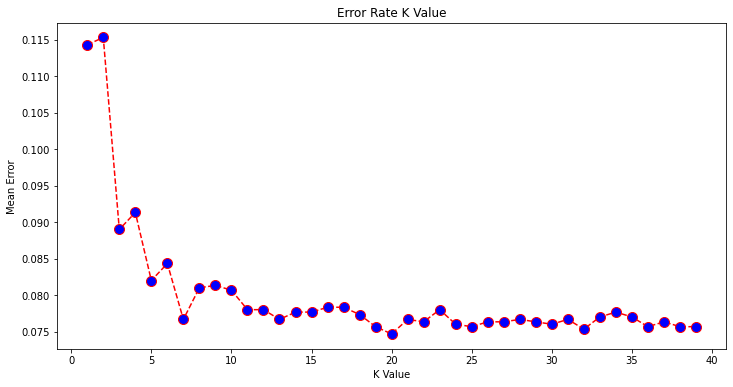

In [8]:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Para crear el modelo lo primero que vamos a hacer es crear un objeto para la clase de KNN, en donde podamos encontrar las funciones de:
<ul>
    <li> fit: para el ingreso de los datos de entrenamiento y se usa la libreria de scipy para calcular la distancia euclidiana entre dos puntos. </li>
    <li> predict: el cual hace un loop por cada dato encontrado en el conjunto de prueba, cada vez en cada loop calculando ladistancia entre la instancia del dato de prueba y con cada instancia de los datos de entrenamiento. Guarda la distancia e index del dato de entrenamiento en una lista. Luego hace un sort en la lista para solamente tener hasta enfrente las distancias mas cortas. Para poder asi obtener los indices para encontrar eso datos K mas cercanos </li>
    <li> score: finalmente tenemos la funcion de score lo cual, al darle las predicciones y el conjunto de prueba con los target, calcula el accuracy score.</li>

In [9]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

In [10]:
clf = KNN(15)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
clf.score(X_test, y_test)


0.9223333333333333

Aqui podemos ver que el algoritmo tiene un accuracy del 92% el cual es razonable y no es tan alto para generar sospecha de overfitting. 

Por lo que el modelo es aceptado y puede ser utilizado para predecir si nuevos datos son naranjas o toronjas. 